# 环境配置与数据加载

In [63]:
# 基础数据处理库
import pandas as pd
import numpy as np

# 模型相关库（sklearn）
from sklearn.model_selection import train_test_split, cross_val_score  # 数据集划分、交叉验证
from sklearn.linear_model import LogisticRegression  # 逻辑回归
from sklearn.tree import DecisionTreeClassifier  # 决策树
from sklearn.ensemble import RandomForestClassifier  # 随机森林
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 评估指标

# 可视化库（可选，用于混淆矩阵可视化）
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略警告
# import warnings
# warnings.filterwarnings('ignore')

# 中文显示设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 读取EDA处理后的数据集（确保文件路径正确）

df = pd.read_csv('..\penguins_eda_processed.csv')

# 查看数据基本信息（确认特征和目标变量）
print("数据集维度：", df.shape)
print("\n数据集前3行：")
print(df.head(3))
print("\n目标变量（种类、性别）分布：")
print("企鹅种类分布：\n", df['species'].value_counts())
print("性别分布：\n", df['sex'].value_counts())




数据集维度： (333, 12)

数据集前3行：
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen         -0.896042         0.780732          -1.426752   
1  Adelie  Torgersen         -0.822788         0.119584          -1.069474   
2  Adelie  Torgersen         -0.676280         0.424729          -0.426373   

   body_mass_g     sex  culmen_ratio  body_mass_kg  species_encoded  \
0    -0.568475    MALE     -1.043718     -0.568475                0   
1    -0.506286  FEMALE     -0.681461     -0.506286                0   
2    -1.190361  FEMALE     -0.744583     -1.190361                0   

   island_encoded  sex_encoded  
0               2            1  
1               2            0  
2               2            0  

目标变量（种类、性别）分布：
企鹅种类分布：
 species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
性别分布：
 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [64]:
print("原始数据 'species' 列的唯一值:")
print(df['species'].unique())
print("\n原始数据 'sex' 列的唯一值:")
print(df['sex'].unique())

原始数据 'species' 列的唯一值:
['Adelie' 'Chinstrap' 'Gentoo']

原始数据 'sex' 列的唯一值:
['MALE' 'FEMALE']


# 确认特征变量与目标变量
## 定义特征集（X）和目标变量（y）

In [65]:
# 特征变量：选择数值型特征（排除目标变量和编码后的冗余特征）
feature_cols = [
    'culmen_length_mm', 'culmen_depth_mm', 
    'flipper_length_mm', 'body_mass_kg',  # 用kg单位（标准化后更稳定）
    'culmen_ratio'  # 衍生特征
]

X = df[feature_cols]  # 特征集

# 目标变量1：企鹅种类（多分类：Adelie/Chinstrap/Gentoo）
y_species = df['species']

# 目标变量2：性别（二分类：MALE/FEMALE）
y_sex = df['sex']

##  数据格式检查

In [66]:
# 检查特征集是否有缺失值（EDA已处理，此处验证）
print("特征集缺失值检查：\n", X.isnull().sum())

# 确保目标变量无异常值
print("\n种类目标变量唯一值：", y_species.unique())
print("性别目标变量唯一值：", y_sex.unique())



特征集缺失值检查：
 culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_kg         0
culmen_ratio         0
dtype: int64

种类目标变量唯一值： ['Adelie' 'Chinstrap' 'Gentoo']
性别目标变量唯一值： ['MALE' 'FEMALE']


# 划分训练集与测试集

In [67]:
# 1. 划分“种类预测”的训练集和测试集
X_train_species, X_test_species, y_train_species, y_test_species = train_test_split(
    X, y_species, 
    test_size=0.2,  # 20%作为测试集
    random_state=42,  # 随机种子（保证结果可复现）
    stratify=y_species  # 按种类分布分层（避免样本偏斜）
)

# 2. 划分“性别预测”的训练集和测试集
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X, y_sex, 
    test_size=0.2,
    random_state=42,
    stratify=y_sex  # 按性别分布分层
)

# 查看划分后的数据量
print("种类预测 - 训练集：", X_train_species.shape, "测试集：", X_test_species.shape)
print("性别预测 - 训练集：", X_train_sex.shape, "测试集：", X_test_sex.shape)

种类预测 - 训练集： (266, 5) 测试集： (67, 5)
性别预测 - 训练集： (266, 5) 测试集： (67, 5)


# 训练 3 种分类模型

## 逻辑回归、决策树、随机森林

In [68]:
# 初始化3种模型（用默认参数，适合课程作业入门）
model_logreg = LogisticRegression(max_iter=1000)  # 逻辑回归（max_iter增大避免收敛警告）
model_dt = DecisionTreeClassifier(random_state=42)  # 决策树
model_rf = RandomForestClassifier(random_state=42)  # 随机森林

# ----------------------
# 1. 训练“企鹅种类预测”模型
# ----------------------
print("开始训练【企鹅种类预测】模型...")
# 逻辑回归训练
model_logreg_species = model_logreg.fit(X_train_species, y_train_species)
# 决策树训练
model_dt_species = model_dt.fit(X_train_species, y_train_species)
# 随机森林训练
model_rf_species = model_rf.fit(X_train_species, y_train_species)
print("种类预测模型训练完成！")

# ----------------------
# 2. 训练“性别预测”模型
# ----------------------
print("\n开始训练【性别预测】模型...")
# 逻辑回归训练
model_logreg_sex = model_logreg.fit(X_train_sex, y_train_sex)
# 决策树训练
model_dt_sex = model_dt.fit(X_train_sex, y_train_sex)
# 随机森林训练
model_rf_sex = model_rf.fit(X_train_sex, y_train_sex)
print("性别预测模型训练完成！")

开始训练【企鹅种类预测】模型...
种类预测模型训练完成！

开始训练【性别预测】模型...
性别预测模型训练完成！


## 10 折交叉验证评估模型稳定性


In [69]:
# 定义交叉验证函数（简化代码，重复调用）
def cross_val_evaluate(model, X_train, y_train, task_name):
    """
    10折交叉验证评估模型
    参数：model-模型，X_train-训练特征，y_train-训练目标，task_name-任务名称（用于输出）
    返回：交叉验证的准确率均值和标准差
    """
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"\n【{task_name}】10折交叉验证结果：")
    print(f"平均准确率：{cv_scores.mean():.4f}")
    print(f"准确率标准差：{cv_scores.std():.4f}")
    print(f"各折准确率：{cv_scores.round(4)}")
    return cv_scores.mean(), cv_scores.std()

# ----------------------
# 1. 评估“企鹅种类预测”模型
# ----------------------
print("="*50)
print("【企鹅种类预测】模型稳定性评估（10折交叉验证）")
print("="*50)
# 逻辑回归交叉验证
logreg_species_mean, logreg_species_std = cross_val_evaluate(
    model_logreg_species, X_train_species, y_train_species, "逻辑回归"
)
# 决策树交叉验证
dt_species_mean, dt_species_std = cross_val_evaluate(
    model_dt_species, X_train_species, y_train_species, "决策树"
)
# 随机森林交叉验证
rf_species_mean, rf_species_std = cross_val_evaluate(
    model_rf_species, X_train_species, y_train_species, "随机森林"
)

# ----------------------
# 2. 评估“性别预测”模型
# ----------------------
print("\n" + "="*50)
print("【性别预测】模型稳定性评估（10折交叉验证）")
print("="*50)
# 逻辑回归交叉验证
logreg_sex_mean, logreg_sex_std = cross_val_evaluate(
    model_logreg_sex, X_train_sex, y_train_sex, "逻辑回归"
)
# 决策树交叉验证
dt_sex_mean, dt_sex_std = cross_val_evaluate(
    model_dt_sex, X_train_sex, y_train_sex, "决策树"
)
# 随机森林交叉验证
rf_sex_mean, rf_sex_std = cross_val_evaluate(
    model_rf_sex, X_train_sex, y_train_sex, "随机森林"
)

【企鹅种类预测】模型稳定性评估（10折交叉验证）

【逻辑回归】10折交叉验证结果：
平均准确率：0.9848
准确率标准差：0.0187
各折准确率：[1.     1.     1.     0.963  1.     1.     0.9615 1.     0.9615 0.9615]

【决策树】10折交叉验证结果：
平均准确率：0.9660
准确率标准差：0.0398
各折准确率：[1.     1.     0.963  0.9259 1.     0.963  0.8846 1.     0.9231 1.    ]

【随机森林】10折交叉验证结果：
平均准确率：0.9775
准确率标准差：0.0247
各折准确率：[1.     1.     0.963  0.9259 1.     0.963  0.9615 1.     1.     0.9615]

【性别预测】模型稳定性评估（10折交叉验证）

【逻辑回归】10折交叉验证结果：
平均准确率：0.8944
准确率标准差：0.0445
各折准确率：[0.9259 0.8519 0.8519 0.9259 0.963  0.9259 0.8077 0.9231 0.8846 0.8846]

【决策树】10折交叉验证结果：
平均准确率：0.8907
准确率标准差：0.0275
各折准确率：[0.9259 0.9259 0.8889 0.8889 0.8889 0.8889 0.8462 0.9231 0.8462 0.8846]

【随机森林】10折交叉验证结果：
平均准确率：0.9171
准确率标准差：0.0472
各折准确率：[0.963  0.8519 0.9259 1.     0.9259 0.8889 0.8462 0.9615 0.8846 0.9231]


## 模型最终评估

【企鹅种类预测】测试集最终评估

【逻辑回归】测试集最终评估：
准确率：0.0000

分类报告：
              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00      29.0
   Chinstrap       0.00      0.00      0.00      14.0
      FEMALE       0.00      0.00      0.00       0.0
      Gentoo       0.00      0.00      0.00      24.0
        MALE       0.00      0.00      0.00       0.0

    accuracy                           0.00      67.0
   macro avg       0.00      0.00      0.00      67.0
weighted avg       0.00      0.00      0.00      67.0



c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\si

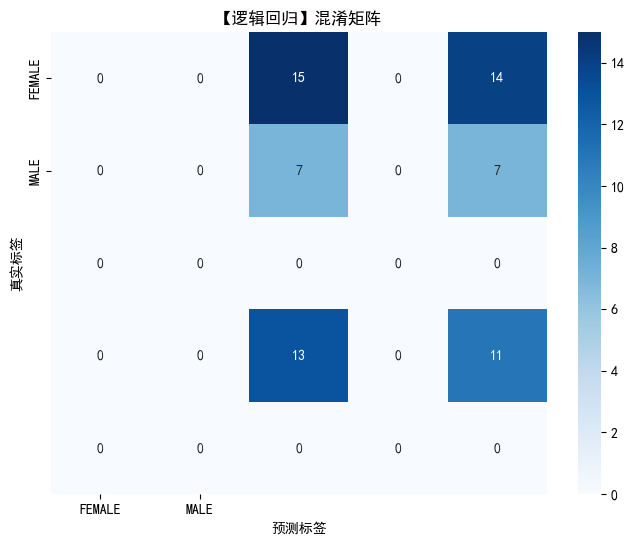


【决策树】测试集最终评估：
准确率：0.0000

分类报告：
              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00      29.0
   Chinstrap       0.00      0.00      0.00      14.0
      FEMALE       0.00      0.00      0.00       0.0
      Gentoo       0.00      0.00      0.00      24.0
        MALE       0.00      0.00      0.00       0.0

    accuracy                           0.00      67.0
   macro avg       0.00      0.00      0.00      67.0
weighted avg       0.00      0.00      0.00      67.0



c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\si

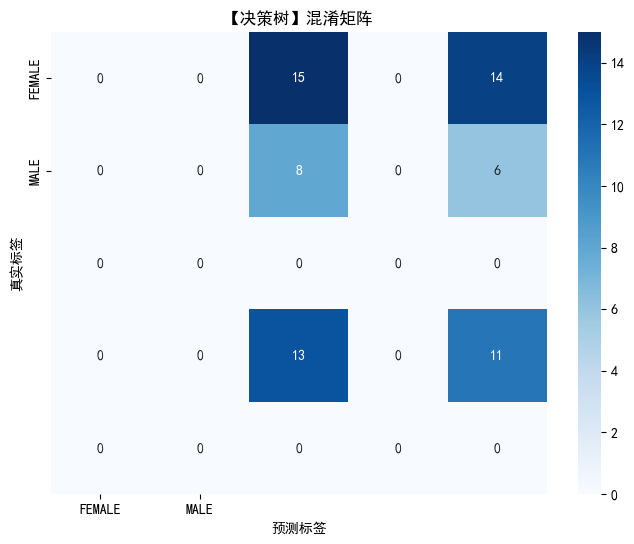


【随机森林】测试集最终评估：
准确率：0.0000

分类报告：
              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00      29.0
   Chinstrap       0.00      0.00      0.00      14.0
      FEMALE       0.00      0.00      0.00       0.0
      Gentoo       0.00      0.00      0.00      24.0
        MALE       0.00      0.00      0.00       0.0

    accuracy                           0.00      67.0
   macro avg       0.00      0.00      0.00      67.0
weighted avg       0.00      0.00      0.00      67.0



c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\15638\anaconda3\envs\py\lib\si

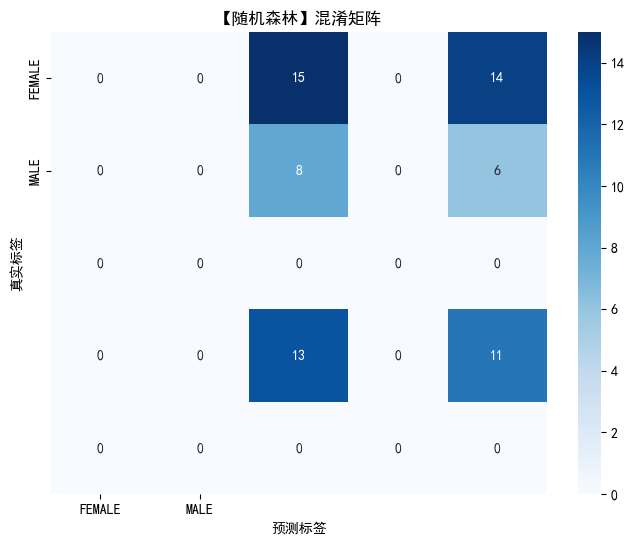


【性别预测】测试集最终评估

【逻辑回归】测试集最终评估：
准确率：0.8806

分类报告：
              precision    recall  f1-score   support

      FEMALE       0.93      0.82      0.87        33
        MALE       0.84      0.94      0.89        34

    accuracy                           0.88        67
   macro avg       0.89      0.88      0.88        67
weighted avg       0.89      0.88      0.88        67



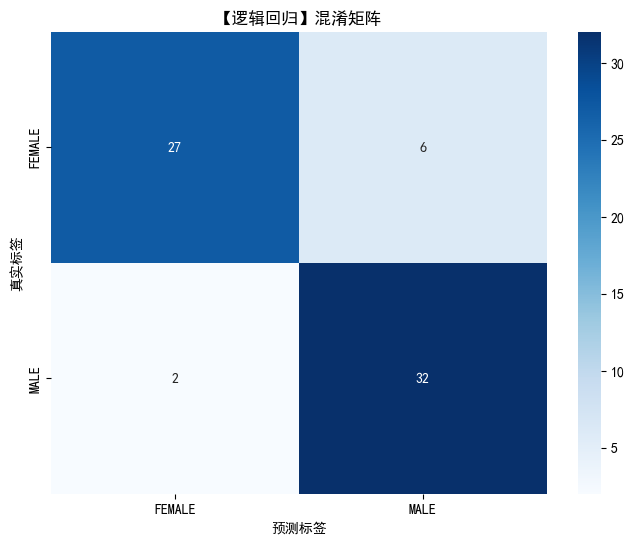


【决策树】测试集最终评估：
准确率：0.8358

分类报告：
              precision    recall  f1-score   support

      FEMALE       0.92      0.73      0.81        33
        MALE       0.78      0.94      0.85        34

    accuracy                           0.84        67
   macro avg       0.85      0.83      0.83        67
weighted avg       0.85      0.84      0.83        67



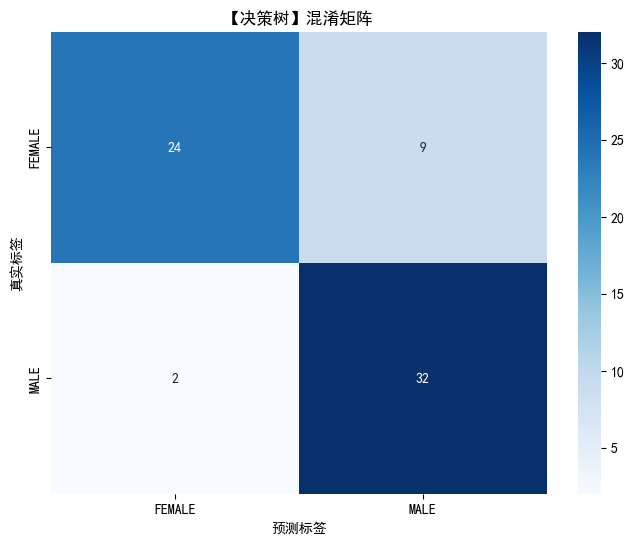


【随机森林】测试集最终评估：
准确率：0.8806

分类报告：
              precision    recall  f1-score   support

      FEMALE       0.93      0.82      0.87        33
        MALE       0.84      0.94      0.89        34

    accuracy                           0.88        67
   macro avg       0.89      0.88      0.88        67
weighted avg       0.89      0.88      0.88        67



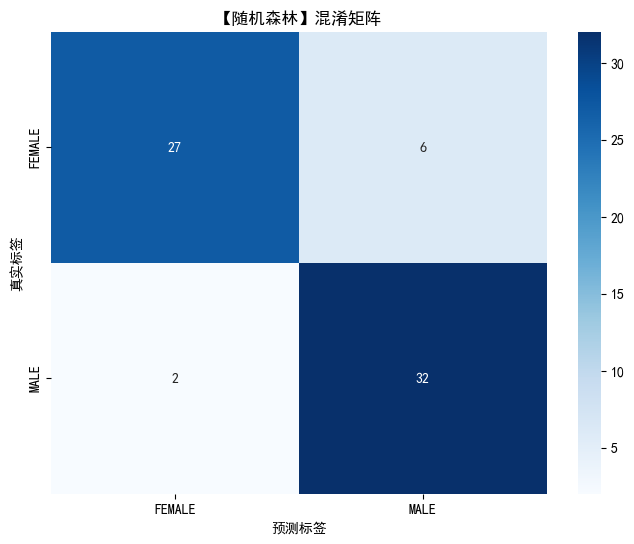

In [70]:
def final_evaluation(model, X_test, y_test, task_name):
    """
    测试集最终评估
    参数：model-训练好的模型，X_test-测试特征，y_test-测试目标，task_name-任务名称
    """
    # 1. 模型预测
    y_pred = model.predict(X_test)
    
    # 2. 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    # 3. 输出结果
    print(f"\n【{task_name}】测试集最终评估：")
    print(f"准确率：{accuracy:.4f}")
    print("\n分类报告：")
    print(classification_report(y_test, y_pred))
    
    # 4. 混淆矩阵可视化（可选，增强报告可读性）
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"【{task_name}】混淆矩阵")
    plt.xlabel("预测标签")
    plt.ylabel("真实标签")
    plt.show()
    
    return accuracy

# ----------------------
# 1. 企鹅种类预测最终评估
# ----------------------
print("="*50)
print("【企鹅种类预测】测试集最终评估")
print("="*50)
# 逻辑回归最终评估
logreg_species_acc = final_evaluation(
    model_logreg_species, X_test_species, y_test_species, "逻辑回归"
)
# 决策树最终评估
dt_species_acc = final_evaluation(
    model_dt_species, X_test_species, y_test_species, "决策树"
)
# 随机森林最终评估
rf_species_acc = final_evaluation(
    model_rf_species, X_test_species, y_test_species, "随机森林"
)

# ----------------------
# 2. 性别预测最终评估
# ----------------------
print("\n" + "="*50)
print("【性别预测】测试集最终评估")
print("="*50)
# 逻辑回归最终评估
logreg_sex_acc = final_evaluation(
    model_logreg_sex, X_test_sex, y_test_sex, "逻辑回归"
)
# 决策树最终评估
dt_sex_acc = final_evaluation(
    model_dt_sex, X_test_sex, y_test_sex, "决策树"
)
# 随机森林最终评估
rf_sex_acc = final_evaluation(
    model_rf_sex, X_test_sex, y_test_sex, "随机森林"
)

In [71]:
# 汇总所有模型的交叉验证均值和测试集准确率
results_df = pd.DataFrame({
    "任务": ["种类预测", "种类预测", "种类预测", "性别预测", "性别预测", "性别预测"],
    "模型": ["逻辑回归", "决策树", "随机森林", "逻辑回归", "决策树", "随机森林"],
    "交叉验证准确率(均值)": [
        logreg_species_mean, dt_species_mean, rf_species_mean,
        logreg_sex_mean, dt_sex_mean, rf_sex_mean
    ],
    "测试集准确率": [
        logreg_species_acc, dt_species_acc, rf_species_acc,
        logreg_sex_acc, dt_sex_acc, rf_sex_acc
    ]
})

# 按任务分组显示
print("模型结果汇总：")
print(results_df.round(4))

模型结果汇总：
     任务    模型  交叉验证准确率(均值)  测试集准确率
0  种类预测  逻辑回归       0.9848  0.0000
1  种类预测   决策树       0.9660  0.0000
2  种类预测  随机森林       0.9775  0.0000
3  性别预测  逻辑回归       0.8944  0.8806
4  性别预测   决策树       0.8907  0.8358
5  性别预测  随机森林       0.9171  0.8806
